### **Disaster Tweets Analysis using LSTM**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read the dataset from GitHub
data_url="https://raw.githubusercontent.com/KrishArul26/Data_set/main/Disaster_Tweet_train.csv"
data=pd.read_csv(data_url,sep=",")

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Reliable vs Unreliable Distribution')

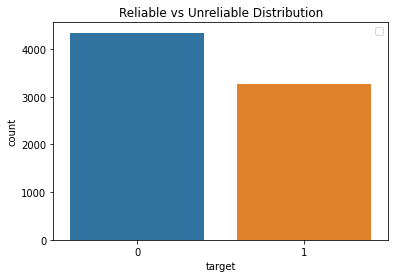

In [5]:

# True vs Non True News Distribution
sns.countplot(data['target'])
plt.legend()
plt.title("Reliable vs Unreliable Distribution")

In [6]:
#Describe about ham and Spam Mail Behavior in all data set
data[data['target']==0].describe()

,id,target
count,4342.000000,4342.0
mean,5276.446338,0.0
std,3157.206802,0.0
min,23.000000,0.0
25%,2513.250000,0.0
50%,5243.500000,0.0
75%,8038.500000,0.0
max,10848.000000,0.0


In [7]:
#Describe about ham and Spam Mail Behavior in all data set
data[data['target']==1].describe()

,id,target
count,3271.000000,3271.0
mean,5661.608071,1.0
std,3097.094809,0.0
min,1.000000,1.0
25%,3104.500000,1.0
50%,5676.000000,1.0
75%,8252.000000,1.0
max,10873.000000,1.0


### **Pre-processing steps for tweet**

This is one of the essential steps in any natural language processing (NLP) task. Data scientists never get filtered, ready-to-use data. To make it workable, there is a lot of processing that needs to happen.So the basic steps involved in cleaning the data are

Converting the text from upper case to lower case Correcting the spelling mistakes Punctuation removal removes unwanted characters e.g. hashtag, hyperlinks, stock tickers and number from tweet Stop words removal Normalization via lemmatization or stemming Tokenization Now let’s discuss all of these in detail. There are no standard sequences or standard steps that are involved. They vary from example to example. Let us now import the dataset, and analyze it to get a basic understanding of it.

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string 
import re
import warnings

warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
#Remove puncuation, newlines and multiple whitespace, lower case everything etc..
ps=PorterStemmer()
def cleaned_text(text):
  corpus=[]
  for i in text.index:
    
    
    review= re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',' ', text[i])
    # Remove Html
    review=re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' ,review)
    #1.remove except a to z and A to Z 
    review=re.sub('[^a-zA-Z]',' ',review)
    #2.Remove all puncuation
    review = re.sub('[\(].*?[\)]', '', review)
    # 2. remove newlines and multiple whitespace, lower case everything
    review = re.sub('\s+', ' ', review)
  # 4. remove special characters
    # Regex to keep . , and ' is [^A-Za-z0-9.,\' ]
    review = re.sub('[^A-Za-z0-9 ]', '', review)
    review=review.lower()
    review=review.split()
    ##Stemming for the each words
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
  return corpus

In [10]:
corpus=cleaned_text(data['text'])

In [11]:
corpus[1:10]

['forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 'top hill see fire wood',
 'emerg evacu happen build across street',
 'afraid tornado come area']

In [12]:
data['cleaned_text']=np.array(corpus)

In [13]:
data.head()

,id,keyword,location,text,target,cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


In [14]:
data=data.iloc[:,3:6]

In [15]:
data.head()

,text,target,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada
2,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...
3,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


### **Find word length of every tweet**

In [16]:
data['Word_length']=data.cleaned_text.apply(lambda x:len(x.split()))

In [17]:
data.head()

,text,target,cleaned_text,Word_length
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us,7
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada,7
2,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...,11
3,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california,6
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...,9


### **Tokenization**

In [18]:
#Spam mail words
from nltk.tokenize import word_tokenize
all_words=[]
for sentence in data['cleaned_text']:
  words=word_tokenize(sentence)
  for word in words:
    all_words.append(word)
        

In [19]:
from collections import Counter
counter_reliable=Counter(all_words)
print(counter_reliable.most_common(1000))
coun_reliable=pd.DataFrame(counter_reliable.most_common(200))
coun_reliable.columns=['Common_Words','count']
coun_reliable.style.background_gradient(cmap='Blues')
coun_reliable

[('like', 411), ('fire', 363), ('amp', 344), ('get', 311), ('bomb', 239), ('new', 228), ('via', 220), ('news', 213), ('one', 209), ('go', 204), ('peopl', 201), ('time', 183), ('kill', 181), ('burn', 180), ('year', 178), ('video', 175), ('flood', 169), ('crash', 166), ('emerg', 164), ('disast', 162), ('bodi', 156), ('attack', 155), ('build', 153), ('day', 151), ('look', 145), ('fatal', 145), ('say', 145), ('home', 144), ('love', 143), ('polic', 143), ('would', 137), ('u', 137), ('make', 133), ('famili', 132), ('evacu', 131), ('still', 130), ('train', 129), ('storm', 129), ('us', 128), ('see', 128), ('got', 126), ('come', 125), ('back', 124), ('know', 123), ('california', 121), ('live', 121), ('suicid', 120), ('watch', 119), ('bag', 119), ('want', 118), ('man', 117), ('death', 117), ('world', 117), ('collaps', 117), ('car', 116), ('scream', 116), ('derail', 116), ('rt', 113), ('first', 109), ('take', 108), ('caus', 106), ('let', 106), ('think', 105), ('two', 104), ('nuclear', 104), ('pm'

,Common_Words,count
0,like,411
1,fire,363
2,amp,344
3,get,311
4,bomb,239
...,...,...
195,said,57
196,women,57
197,terror,57
198,content,57


In [20]:
data['token_text']=data.cleaned_text.apply(lambda x:x.split())

In [21]:
data.head()

,text,target,cleaned_text,Word_length,token_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv us,7,"[deed, reason, earthquak, may, allah, forgiv, us]"
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la rong sask canada,7,"[forest, fire, near, la, rong, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,resid ask shelter place notifi offic evacu she...,11,"[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california,6,"[peopl, receiv, wildfir, evacu, order, califor..."
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...,9,"[got, sent, photo, rubi, alaska, smoke, wildfi..."


In [22]:
print("TWEET RAW No.1           :"+" "+str(data.text[0]))
print("CLEANED TWEET RAW No.1   :"+" "+str(data.cleaned_text[0]))
print("TOKENIZE WORD RAW No.1   :"+" "+str(data.token_text[0]))

TWEET RAW No.1           : Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
CLEANED TWEET RAW No.1   : deed reason earthquak may allah forgiv us
TOKENIZE WORD RAW No.1   : ['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us']


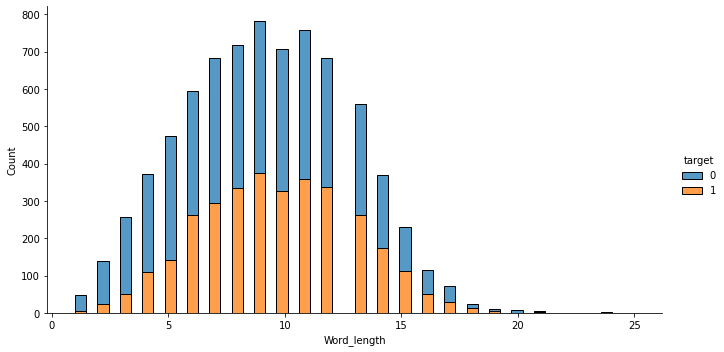

In [23]:
sns.displot(data =data, kind = 'hist', x = 'Word_length', hue = 'target',
            multiple = 'stack',bins=50,height = 5, aspect = 1.9)

# The distibution of tweet text length vs target - there is a correlation between tweet length and target 

In [24]:
max_len=data['Word_length'].max()+5
print(max_len)

30


In [25]:
from sklearn import model_selection
X=data['cleaned_text']
y=data['target']
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,y.astype(int),test_size=0.2,stratify=data['target'],random_state=100)
#train,test=model_selection.train_test_split(data,test_size=0.2,random_state=100)
print("Training data set contains " + " " + str(len(x_train))+ " "+ "Observation")
print("Test data set contains  " + " " + str(len(x_test))+ " "+ "Observation")

Training data set contains  6090 Observation
Test data set contains   1523 Observation


### **Train-Test Spliting**

### **Tokenizer - Text Pre-Processing with Keras**

In [26]:

#Use Keras library to create a vector of words for every tweet.
#These vectors are padded up to 50, which can be the limit of number of words possible in a 150 character tweet.

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#Constructing Tokenizer Method
tokenizer= Tokenizer() #Tokenizer class constructor for training documents
# test_tokenizer = Tokenizer() #Tokenizer class constructor for testing documents

#Fitting Tokenizer to the trained Cleaned_text 
tokenizer.fit_on_texts(x_train)

# Integer encode the documents
train_encoded = tokenizer.texts_to_sequences(x_train)
test_encoded = tokenizer.texts_to_sequences(x_test)




In [27]:
train_encoded[0]

[4638, 3234, 4639, 3235, 3, 4640, 80, 99, 2127, 891, 2128, 29, 4641, 255, 3]

In [28]:
word_index = tokenizer.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 11432


### Padding 

In [29]:
from keras.preprocessing.sequence import pad_sequences

train_pad = pad_sequences(tokenizer.texts_to_sequences(x_train),
                        maxlen = max_len)
test_pad = pad_sequences(tokenizer.texts_to_sequences(x_test),
                       maxlen = max_len)

print("Training X Shape:",train_pad.shape)
print("Testing X Shape:",test_pad.shape)

Training X Shape: (6090, 30)
Testing X Shape: (1523, 30)


In [30]:
print("training second raw observation          :"+" "+X[2])
print("training second raw encoded observation  : "+" "+str(train_encoded[2]))
print("training second raw padding observation  : "+" "+str(train_pad[2]))

training second raw observation          : resid ask shelter place notifi offic evacu shelter place order expect
training second raw encoded observation  :  [2557, 129, 454, 818, 83, 938, 1008]
training second raw padding observation  :  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0 2557  129  454  818   83
  938 1008]


In [31]:
vocab_size = len(tokenizer.word_index) + 1


print("The training set vocab size is "+ str(vocab_size))



The training set vocab size is 11433


In [32]:
print(tokenizer.word_counts)

OrderedDict([('leitchfield', 1), ('ky', 2), ('bella', 1), ('edward', 2), ('amp', 270), ('rosali', 1), ('need', 76), ('rescu', 68), ('adopt', 4), ('local', 13), ('foster', 4), ('home', 115), ('sponsorship', 1), ('trap', 39), ('panic', 35), ('spinningbot', 3), ('anoth', 58), ('stand', 26), ('user', 14), ('deton', 75), ('killer', 12), ('queen', 11), ('camp', 18), ('war', 86), ('zone', 33), ('rove', 1), ('raccoon', 1), ('toughen', 1), ('citi', 57), ('slicker', 2), ('wit', 9), ('first', 90), ('demolit', 21), ('derbi', 4), ('today', 84), ('psa', 2), ('excit', 6), ('worn', 2), ('hour', 37), ('isi', 24), ('claim', 21), ('respons', 20), ('saudi', 35), ('mosqu', 28), ('suicid', 97), ('bomb', 192), ('dopeitsv', 1), ('ahh', 3), ('babi', 30), ('ted', 3), ('cruz', 7), ('fire', 298), ('back', 96), ('jeb', 6), ('bush', 23), ('lose', 11), ('republican', 8), ('like', 326), ('mitt', 2), ('video', 131), ('originalfunko', 2), ('spencer', 3), ('thunder', 39), ('buddi', 4), ('violat', 5), ('new', 184), ('imp

### **Word Embeddings-Glove Embedding Matrix**

###For the getting Glove Embedding matrix, I'm going to use GloVe’s 50d word vector pre-trained on 2 billion tweets. The GLoVe link: https://nlp.stanford.edu/projects/glove/

In [33]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [34]:
embeddings_index = {}
GLOVE_EMB='/content/drive/MyDrive/Google_colab_project/glove.twitter.27B.50d.txt'
f = open(GLOVE_EMB)
for line in f:
  
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

In [35]:
print('Found %s word vectors.' %len(embeddings_index))

Found 1193514 word vectors.


### Create a weight matrix



In [36]:

max_words = len(word_index) + 1
embedding_dims = 100

embedding_matrix = np.zeros((max_words, embedding_dims))
for word, i in word_index.items():

  if i > max_words:
    continue   
    emb_vec = embedding_dict.get(word)    
    if emb_vec is not None:
      embedding_matrix[i] = emb_vec   

In [37]:
 word_index

{'like': 1,
 'fire': 2,
 'amp': 3,
 'get': 4,
 'bomb': 5,
 'new': 6,
 'via': 7,
 'news': 8,
 'one': 9,
 'go': 10,
 'peopl': 11,
 'year': 12,
 'kill': 13,
 'time': 14,
 'flood': 15,
 'disast': 16,
 'burn': 17,
 'day': 18,
 'video': 19,
 'attack': 20,
 'crash': 21,
 'bodi': 22,
 'love': 23,
 'emerg': 24,
 'build': 25,
 'polic': 26,
 'look': 27,
 'still': 28,
 'home': 29,
 'fatal': 30,
 'say': 31,
 'evacu': 32,
 'storm': 33,
 'us': 34,
 'u': 35,
 'famili': 36,
 'come': 37,
 'know': 38,
 'want': 39,
 'world': 40,
 'make': 41,
 'train': 42,
 'see': 43,
 'suicid': 44,
 'watch': 45,
 'back': 46,
 'california': 47,
 'would': 48,
 'man': 49,
 'bag': 50,
 'scream': 51,
 'death': 52,
 'rt': 53,
 'collaps': 54,
 'live': 55,
 'first': 56,
 'car': 57,
 'take': 58,
 'pm': 59,
 'wreck': 60,
 'war': 61,
 'derail': 62,
 'dead': 63,
 'today': 64,
 'accid': 65,
 'think': 66,
 'caus': 67,
 'two': 68,
 'got': 69,
 'nuclear': 70,
 'hiroshima': 71,
 'work': 72,
 'let': 73,
 'plan': 74,
 'good': 75,
 'old': 76

In [38]:
embedding_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Embedding Layer

In [39]:
import tensorflow as tf

embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          embedding_dims,
                                          weights=[embedding_matrix],
                                          input_length=max_len,
                                          trainable=False)

### LSTM-Modeling

We are clear to build our Deep Learning model. While developing a DL model, we should keep in mind of key things like Model Architecture, Hyperparmeter Tuning and Performance of the model.

As you can see in the word cloud, the some words are predominantly feature in both Positive and Negative tweets. This could be a problem if we are using a Machine Learning model like Naive Bayes, SVD, etc.. That's why we use Sequence Models.

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction.

For model architecture, we use

1) **Embedding Layer** - Generates Embedding Vector for each input sequence.

2) **Conv1D Laye**r - Its using to convolve data into smaller feature vectors.

3) **LSTM** - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

4) **Dense** - Fully Connected Layers for classification

In [40]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [41]:
sequence_input = Input(shape=(max_len,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

### Compile the Model

In [42]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 100)           1143300   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 30, 100)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 26, 64)            32064     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0     

In [43]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
LR = 1e-5


model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.01,
                                     min_lr = 0.001,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [44]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [45]:
print(y_train.shape)

(6090, 1)


In [46]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on GPU...


In [47]:
BATCH_SIZE=512
EPOCHS=10
history = model.fit(train_pad, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(test_pad, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
12/12 [==============================] - 10s 293ms/step - loss: 0.6931 - accuracy: 0.5702 - val_loss: 0.6931 - val_accuracy: 0.5706
Epoch 2/10
12/12 [==============================] - 3s 219ms/step - loss: 0.6931 - accuracy: 0.5643 - val_loss: 0.6931 - val_accuracy: 0.5706
Epoch 3/10
12/12 [==============================] - 3s 226ms/step - loss: 0.6931 - accuracy: 0.5688 - val_loss: 0.6931 - val_accuracy: 0.5706
Epoch 4/10
12/12 [==============================] - 3s 211ms/step - loss: 0.6931 - accuracy: 0.5759 - val_loss: 0.6931 - val_accuracy: 0.5706
Epoch 5/10
12/12 [==============================] - 3s 216ms/step - loss: 0.6931 - accuracy: 0.5654 - val_loss: 0.6931 - val_accuracy: 0.5706
Epoch 6/10
12/12 [==============================] - 3s 211ms/step - loss: 0.6931 - accuracy: 0.5666 - val_loss: 0.6931 - val_accuracy: 0.5706
Epoch 7/10
12/12 [==============================] - 2s 210ms/step - loss: 0.6931 - accuracy: 0.5667 - val_loss: 0.6931 - val_accuracy: 0.5706
Epoch